STROKE_KNN_Classifer

In [1]:
#import dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [2]:
df = pd.read_csv("STROKE_final_data.csv")
df.head(20)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,GLUCOSE,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,TIME,PERIOD,DEATH,STROKE
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,77.0,0,0,0,0,0,0,1,0,0
1,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,76.0,0,0,0,0,0,0,1,0,0
2,9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,...,70.0,0,0,0,0,0,0,1,0,0
3,10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,...,103.0,0,0,0,0,1,0,1,1,1
4,11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,...,85.0,0,0,0,0,0,0,1,0,0
5,11263,2,228.0,43,180.0,110.0,0,0.0,30.30,0,...,99.0,0,0,0,0,1,0,1,0,0
6,12629,2,205.0,63,138.0,71.0,0,0.0,33.11,0,...,85.0,0,0,0,0,0,0,1,0,0
7,12806,2,313.0,45,100.0,71.0,1,20.0,21.68,0,...,78.0,0,0,0,0,0,0,1,0,0
8,14367,1,260.0,52,141.5,89.0,0,0.0,26.36,0,...,79.0,0,0,0,0,1,0,1,0,0
9,16365,1,225.0,43,162.0,107.0,1,30.0,23.61,0,...,88.0,0,0,0,0,1,0,1,0,0


In [3]:
STROKE_df = df.set_index('RANDID')
#Remove columns not involved in analysis
#removed 'Time', 'Period', 'Death', 'MI_FCHD', 'TIMEMI', 'TIMEMIFC'
STROKE_df = STROKE_df[['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
       'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'PREVCHD', 'PREVAP', 'PREVHYP', 'STROKE']]
STROKE_df.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVCHD,PREVAP,PREVHYP,STROKE
RANDID,,,,,,,,,,,,,,,,
2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0,0,0
6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,0,0,0,0
9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,0.0,75.0,70.0,0,0,0,0
10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,0.0,65.0,103.0,0,0,1,1
11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,0.0,85.0,85.0,0,0,0,0


In [4]:
y = STROKE_df["STROKE"]
target_names = ["negative", "positive"]

In [5]:
X = STROKE_df.drop("STROKE", axis=1)
X.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVCHD,PREVAP,PREVHYP
RANDID,,,,,,,,,,,,,,,
2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0,0
6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,0,0,0
9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,0.0,75.0,70.0,0,0,0
10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,0.0,65.0,103.0,0,0,1
11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,0.0,85.0,85.0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=49)

In [8]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [9]:

# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.846
k: 3, Train/Test Score: 0.923/0.876
k: 5, Train/Test Score: 0.919/0.889
k: 7, Train/Test Score: 0.917/0.895
k: 9, Train/Test Score: 0.914/0.901
k: 11, Train/Test Score: 0.914/0.905
k: 13, Train/Test Score: 0.914/0.906
k: 15, Train/Test Score: 0.914/0.906
k: 17, Train/Test Score: 0.914/0.906
k: 19, Train/Test Score: 0.914/0.906


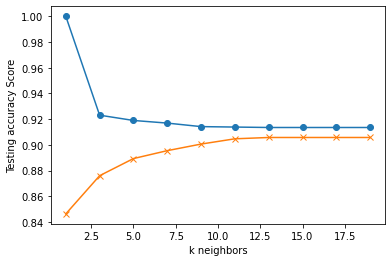

In [11]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [12]:
# Choose K = 13 from above and re-fit the KNN Classifier using that k value.
# Note that k = 13 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.906


In [13]:
#Make predictions (0 = no event occurred, 1 = event occurred)
predictions = knn.predict(X_test_scaled)
STROKE_predictions = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
STROKE_predictions

,Prediction,Actual
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
971,0,0
972,0,0
973,0,0
974,0,0


In [14]:
p0a0 = STROKE_predictions.loc[(STROKE_predictions['Prediction']==0) & (STROKE_predictions['Actual']==0)]
p1a1 = STROKE_predictions.loc[(STROKE_predictions['Prediction']==1) & (STROKE_predictions['Actual']==1)]
p0a1 = STROKE_predictions.loc[(STROKE_predictions['Prediction']==0) & (STROKE_predictions['Actual']==1)]
p1a0 = STROKE_predictions.loc[(STROKE_predictions['Prediction']==1) & (STROKE_predictions['Actual']==0)]

print(f"Event prediction = 0 and actual = 0:  {len(p0a0)}")
print(f"Event prediction = 1 and actual = 1:  {len(p1a1)}")
print(f"Event prediction = 0 and actual = 1:  {len(p0a1)}")
print(f"Event prediction = 1 and actual = 0:  {len(p1a0)}")

Event prediction = 0 and actual = 0:  883
Event prediction = 1 and actual = 1:  1
Event prediction = 0 and actual = 1:  91
Event prediction = 1 and actual = 0:  1


Separate by gender

In [15]:
#filter df by gender (males = 1, females = 2)
male_STROKE = STROKE_df.loc[(STROKE_df["SEX"] ==1)]
female_STROKE = STROKE_df.loc[(STROKE_df["SEX"] ==2)]

In [16]:
male_STROKE_df = male_STROKE.drop('SEX', axis=1)
female_STROKE_df = female_STROKE.drop('SEX', axis=1)

In [17]:
y_male = male_STROKE_df["STROKE"]
male_target_names = ["negative", "positive"]

y_female = female_STROKE_df["STROKE"]
female_target_names = ["negative", "positive"]

In [18]:
X_male = male_STROKE_df.drop("STROKE", axis=1)
X_female = female_STROKE.drop("STROKE", axis=1)

In [19]:
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_male, y_male, random_state=49)
X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_female, y_female, random_state=49)

In [20]:
# Create a StandardScater model and fit it to the training data - male

X_male_scaler = StandardScaler().fit(X_male_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_male_train_scaled = X_male_scaler.transform(X_male_train)
X_male_test_scaled = X_male_scaler.transform(X_male_test)

In [21]:
m_train_scores = []
m_test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_male_train_scaled, y_male_train)
    train_score = knn.score(X_male_train_scaled, y_male_train)
    test_score = knn.score(X_male_test_scaled, y_male_test)
    m_train_scores.append(train_score)
    m_test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


k: 1, Train/Test Score: 1.000/0.831
k: 3, Train/Test Score: 0.916/0.876
k: 5, Train/Test Score: 0.912/0.887
k: 7, Train/Test Score: 0.909/0.896
k: 9, Train/Test Score: 0.909/0.901
k: 11, Train/Test Score: 0.905/0.905
k: 13, Train/Test Score: 0.905/0.905
k: 15, Train/Test Score: 0.906/0.905
k: 17, Train/Test Score: 0.906/0.905
k: 19, Train/Test Score: 0.907/0.905


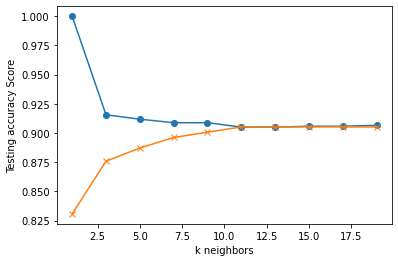

In [22]:
plt.plot(range(1, 20, 2), m_train_scores, marker='o')
plt.plot(range(1, 20, 2), m_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


In [23]:
# Choose K = 13 from above and re-fit the KNN Classifier using that k value.
# Note that k = 13 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_male_train_scaled, y_male_train)
print('k=13 Test Acc: %.3f' % knn.score(X_male_test_scaled, y_male_test))

k=13 Test Acc: 0.905


In [24]:
#Make predictions (0 = no event occurred, 1 = event occurred)
m_predictions = knn.predict(X_male_test_scaled)
m_STROKE_predictions = pd.DataFrame({"Prediction": m_predictions, "Actual": y_male_test}).reset_index(drop=True)
m_STROKE_predictions

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
438,0,0
439,0,0
440,0,0
441,0,0


In [25]:
p0a0 = m_STROKE_predictions.loc[(m_STROKE_predictions['Prediction']==0) & (m_STROKE_predictions['Actual']==0)]
p1a1 = m_STROKE_predictions.loc[(m_STROKE_predictions['Prediction']==1) & (m_STROKE_predictions['Actual']==1)]
p0a1 = m_STROKE_predictions.loc[(m_STROKE_predictions['Prediction']==0) & (m_STROKE_predictions['Actual']==1)]
p1a0 = m_STROKE_predictions.loc[(m_STROKE_predictions['Prediction']==1) & (m_STROKE_predictions['Actual']==0)]

print(f"Event prediction = 0 and actual = 0 (male):  {len(p0a0)}")
print(f"Event prediction = 1 and actual = 1 (male):  {len(p1a1)}")
print(f"Event prediction = 0 and actual = 1 (male):  {len(p0a1)}")
print(f"Event prediction = 1 and actual = 0 (male):  {len(p1a0)}")

Event prediction = 0 and actual = 0 (male):  401
Event prediction = 1 and actual = 1 (male):  0
Event prediction = 0 and actual = 1 (male):  42
Event prediction = 1 and actual = 0 (male):  0


In [26]:
# Create a StandardScater model and fit it to the training data - female

X_female_scaler = StandardScaler().fit(X_female_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_female_train_scaled = X_female_scaler.transform(X_female_train)
X_female_test_scaled = X_female_scaler.transform(X_female_test)

In [27]:
f_train_scores = []
f_test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_female_train_scaled, y_female_train)
    train_score = knn.score(X_female_train_scaled, y_female_train)
    test_score = knn.score(X_female_test_scaled, y_female_test)
    f_train_scores.append(train_score)
    f_test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.865
k: 3, Train/Test Score: 0.930/0.895
k: 5, Train/Test Score: 0.922/0.899
k: 7, Train/Test Score: 0.919/0.912
k: 9, Train/Test Score: 0.917/0.914
k: 11, Train/Test Score: 0.917/0.914
k: 13, Train/Test Score: 0.917/0.914
k: 15, Train/Test Score: 0.917/0.914
k: 17, Train/Test Score: 0.917/0.914
k: 19, Train/Test Score: 0.917/0.914
k: 21, Train/Test Score: 0.917/0.914
k: 23, Train/Test Score: 0.917/0.914
k: 25, Train/Test Score: 0.917/0.914
k: 27, Train/Test Score: 0.917/0.914
k: 29, Train/Test Score: 0.917/0.914


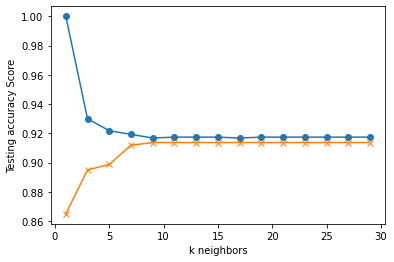

In [28]:
plt.plot(range(1, 30, 2), f_train_scores, marker='o')
plt.plot(range(1, 30, 2), f_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [29]:
# Choose K = 15 from above and re-fit the KNN Classifier using that k value.
# Note that k = 15 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_female_train_scaled, y_female_train)
print('k=15 Test Acc: %.3f' % knn.score(X_female_test_scaled, y_female_test))

k=15 Test Acc: 0.914


In [30]:
#Make predictions (0 = no event occurred, 1 = event occurred)
f_predictions = knn.predict(X_female_test_scaled)
f_STROKE_predictions = pd.DataFrame({"Prediction": f_predictions, "Actual": y_female_test}).reset_index(drop=True)
f_STROKE_predictions

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
528,0,0
529,0,0
530,0,0
531,0,0


In [31]:
p0a0 = m_STROKE_predictions.loc[(m_STROKE_predictions['Prediction']==0) & (m_STROKE_predictions['Actual']==0)]
p1a1 = m_STROKE_predictions.loc[(m_STROKE_predictions['Prediction']==1) & (m_STROKE_predictions['Actual']==1)]
p0a1 = m_STROKE_predictions.loc[(m_STROKE_predictions['Prediction']==0) & (m_STROKE_predictions['Actual']==1)]
p1a0 = m_STROKE_predictions.loc[(m_STROKE_predictions['Prediction']==1) & (m_STROKE_predictions['Actual']==0)]

print(f"Event prediction = 0 and actual = 0 (female):  {len(p0a0)}")
print(f"Event prediction = 1 and actual = 1 (female):  {len(p1a1)}")
print(f"Event prediction = 0 and actual = 1 (female):  {len(p0a1)}")
print(f"Event prediction = 1 and actual = 0 (female):  {len(p1a0)}")

Event prediction = 0 and actual = 0 (female):  401
Event prediction = 1 and actual = 1 (female):  0
Event prediction = 0 and actual = 1 (female):  42
Event prediction = 1 and actual = 0 (female):  0
